In [1]:
### IMPORTS
import numpy as np
np.random.seed(100)
import scipy.stats as stats # has function pearsonr(x,y)
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston # We will work with the Boston housing data in some of what follows later

## Exercise 1: T-tests

In this exercise, we will apply a t-test to data generated from normal distributions with different means.  We will investigate if the test is able to detect that the data is generated from two different distributions as a function of both (1) the difference in means for the generating distribution and (2) as a function of the number of samples.   We will also explore applying a t-test to data that was not generated from a normal distribution, and instead was generated from a chi-squared distribution and investigate the same things.

In [2]:
# Here, we generate data from two normal distributions with the same standard deviation
# We would like any statistical test that we run to be able to tell us that the underlying 
# population means responsible for generating x1 and x2 are different
mean1 = 1
true_diff_in_means = 0.2
mean2 = mean1 + true_diff_in_means

x1 = np.random.standard_normal((100,)) + mean1
x2 = np.random.standard_normal((100,)) + mean2

Text(0.5, 0, 'x')

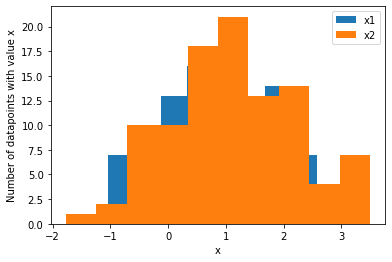

In [3]:
# Plot the sampled data
plt.hist(x1, label = "x1")
plt.hist(x2, label = "x2")
plt.legend()
plt.ylabel("Number of datapoints with value x")
plt.xlabel("x")

In [4]:
# Now run a t-test: is the null hypothesis rejected?
returned_stat, p_val = stats.ttest_ind(x1, x2)
print(p_val)

0.10754128553529661


In [5]:
# TODO: explore how the rejection of the null hypothesis varies as a function of 
# the number of samples and as a function of the difference in generative means. 
# Produce an image with number of samples on the x-axis and difference in means on the y-axis 
# and color a pixel based on whether the null hypothesis was rejected for the given value 
# of the difference and number of samples. It might be good to keep mean1 fixed, and then 
# just alter the true_diff_in_means parameter in case the rejection rate is affected by the 
# size of mean1.  Note: the function plt.imshow() is useful for showing images.  

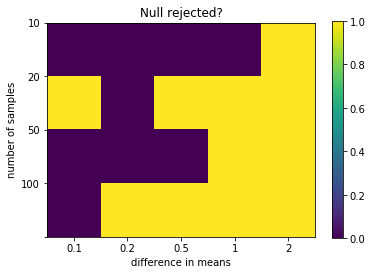

In [6]:
diffs = [0.1, 0.2, 0.5, 1, 2]
num_samples = [10, 20, 50, 100]
mean1 = 53
arr_to_plot = np.zeros((len(num_samples),len(diffs)))
for i, diff in enumerate(diffs):
    for j, num_sample in enumerate(num_samples):
        mean2 = mean1 + diff
        x1 = np.random.standard_normal((num_sample,)) + mean1
        x2 = np.random.standard_normal((num_sample,)) + mean2
        _, p_val = stats.ttest_ind(x1, x2)
        if p_val < 0.05:
            arr_to_plot[j][i] = 1
plt.imshow(arr_to_plot)
plt.xlabel("difference in means")
plt.ylabel("number of samples")
plt.xticks(np.arange(len(diffs)), diffs)
plt.yticks(np.arange(len(num_samples)+1)-0.5, num_samples)
plt.title("Null rejected?")
plt.colorbar()

Text(0.5, 0, 'x')

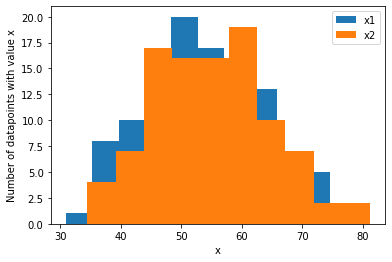

In [7]:
# Let's now modify the distribution that we sample x1 and x2 from, and instead sample from 
# the chi-squared distribution 
mean1 = 53
true_diff_in_means = 2
mean2 = mean1 + true_diff_in_means
x1 = stats.chi2.rvs(df = mean1, size=100)
x2 = stats.chi2.rvs(df = mean2, size=100)

plt.hist(x1, label = "x1")
plt.hist(x2, label = "x2")
plt.legend()
plt.ylabel("Number of datapoints with value x")
plt.xlabel("x")

In [8]:
# Now run a t-test: is the null hypothesis rejected?
returned_stat, p_val = stats.ttest_ind(x1, x2)
print(p_val)

0.09114057190642649


In [9]:
# TODO: do as before, and explore how the rejection of the null hypothesis varies as a 
# function of the number of samples and as a function of the difference in generative means 
# but now for data generated from the chi-squared distribution.
# Produce an image with number of samples on the x-axis and difference in means on the y-axis 
# and color a pixel based on whether the null hypothesis was rejected for the given value 
# of the difference and number of samples. It might be good to keep mean1 fixed, and then 
# just alter the true_diff_in_means parameter in case the rejection rate is affected by the 
# size of mean1.  Note: the function plt.imshow() is useful for showing images.  

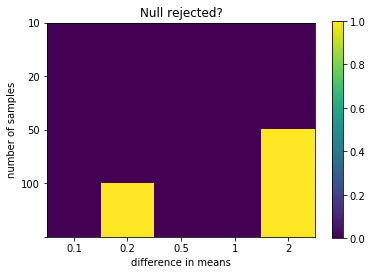

In [10]:
diffs = [0.1, 0.2, 0.5, 1, 2]
num_samples = [10, 20, 50, 100]
mean1 = 53
arr_to_plot = np.zeros((len(num_samples),len(diffs)))
for i, diff in enumerate(diffs):
    for j, num_sample in enumerate(num_samples):
        mean2 = mean1 + diff
        x1 = stats.chi2.rvs(df = mean1, size=num_sample)
        x2 = stats.chi2.rvs(df = mean2, size=num_sample)
        _, p_val = stats.ttest_ind(x1, x2)
        if p_val < 0.05:
            arr_to_plot[j][i] = 1
plt.imshow(arr_to_plot)
plt.xlabel("difference in means")
plt.ylabel("number of samples")
plt.xticks(np.arange(len(diffs)), diffs)
plt.yticks(np.arange(len(num_samples)+1)-0.5, num_samples)
plt.title("Null rejected?")
plt.colorbar()

Question: Does the t-test always detect a difference in means when the generative distribution has a difference in means?  

## Exercise 2: Permutation test

In what follows, we would like to investigate the relationship between the per capita crime of a town and  the median value of house price in the town.  We will work with the Boston housing dataset that is documented here (https://scikit-learn.org/stable/datasets/index.html#boston-dataset).  You will write a function to implement a permutation test in order to determine whether the measured correlation value is statistically significant.

In [11]:
### HELPER FUNCTION
def compute_corr(x,y):
    """
    Function to compute the correlation between two vectors, x and y
    
    :param x: vector of values
    :param y: vector of values
    :return: Pearson correlation between vectors x and y
    """
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    var_x = np.var(x)
    var_y = np.var(y)
    x_recentered = x - mean_x
    y_recentered = y - mean_y
    corr = 1/x.size * np.dot(x_recentered, y_recentered) / np.sqrt(var_x * var_y)
    return corr

In [12]:
# Let's load the data that we will work with: the Boston housing dataset.
# This is a commonly used dataset in Machine Learning classes.  You can read more about this
# dataset and its attributes here: 
# https://scikit-learn.org/stable/datasets/index.html#boston-dataset
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [13]:
# Let's look at the list of predictors we have for predicting house prices:
boston.feature_names  

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [14]:
# Let's extract out the per capita crime by town:
crime = boston.data[:,0]

In [15]:
# Median value of owner-occupied homes in $1000’s for a town
house_prices = boston.target

Text(0.5, 1.0, 'Boston house price dataset')

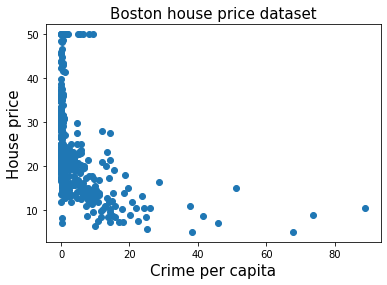

In [16]:
# Let's now plot this data:
plt.scatter(crime, house_prices)
plt.ylabel("House price", fontsize = 15)
plt.xlabel("Crime per capita", fontsize = 15)
plt.title("Boston house price dataset", fontsize = 15)

In [17]:
# Let's use scipy's stats package in order to calculate the correlation
# and compare the value they calculate to the one we calculate with our "compute_corr" func
r_true, pval = stats.pearsonr(crime,house_prices)

print(r_true)

r_computed = compute_corr(crime,house_prices)
print(r_computed)

-0.38830460858681154
-0.38830460858681154


In [18]:
## TODO: Write a function to shuffle the house price values associated with each per capita
# crime value

def shuffle_data(house_prices):
    """
    Return a vector of shuffled house price data
    
    :param house_prices: true vector of house price values
    :return shuffled_prices: vector of shuffled house price values
    """
    shuffled_idx = np.random.choice(len(house_prices), len(house_prices), replace=False)
    shuffled_prices = house_prices[shuffled_idx]
    return shuffled_prices

In [19]:
## TODO: Implement a permutation test
N_permutations = 1000
corr_vals = []
for i in range(N_permutations):
    # TODO: Fill this in; append a correlation value, corr_val, to the corr_vals list
    shuffled_prices = shuffle_data(house_prices)
    corr_val = compute_corr(crime,shuffled_prices)
    corr_vals.append(corr_val)

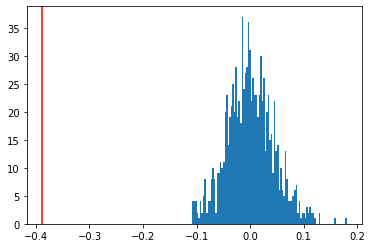

In [20]:
# Plot distribution of correlation values and add a vertical line to show the true correlation
# value:
plt.hist(corr_vals, bins = 100)
plt.axvline(x=r_computed, color = 'r')

In [21]:
## TODO: write a function to calculate the P value given the null distribution you distributed
## from shuffling the data, and the true correlation value, r_computed
def calculate_p_value(corr_vals, r_computed):
    """
    Given the true correlation value for the data, r_computed, calculate a p-value based on 
    correlation values obtained with shuffling
    
    :param corr_vals: list of correlation values obtained by shuffling the data
    :param r_computed: true correlation value obtained from the data
    :return p_val: p value
    """
    ## TODO: FIll this in
    # Examine number of samples with abs(r) > r_computed
    number_samples_greater = np.sum(np.abs(corr_vals)>np.abs(r_computed))
    p_val = number_samples_greater/len(corr_vals)
    return p_val

In [22]:
p_val = calculate_p_value(corr_vals, r_computed)
print(p_val)

0.0


In [23]:
# Compare with scipy:
r_true, pval_scipy = stats.pearsonr(crime,house_prices)
print(pval_scipy)

1.1739870821941207e-19


Questions:
    1.  Compare the p value that you obtained with your implementation of the permutation test with that that scipy's stats package would return (run ``r_true, pval = stats.pearsonr(crime,house_prices)`` to get scipy's stats p-value).  If there are differences, why do you think this is?
    2.  What is the effect of increasing/decreasing the number of permutations that you carry out?  How does the shape of the null distribution change?  How does the retrieved p-value change?  (Try a few values; e.g. 10, 100, 1000, 10000)
    3.  State explicitly what the null hypothesis and the alternative hypothesis are when you are carrying out the permutation test on this data
    4.  Are you able to reject the null hypothesis?